In [1]:
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns

In [2]:
# Load the datasets
train_path = "train.csv"
test_path = "test.csv"

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

In [3]:
# Display basic info about train dataset
train_info = train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# Display basic info about train dataset
train_head = train_df.head()
train_desc = train_df.describe()

In [5]:
# Display basic info about test dataset
test_info = test_df.info()
test_head = test_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [6]:
train_info, train_head, train_desc, test_info, test_head

(None,
    Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
 0   1          60       RL         65.0     8450   Pave   NaN      Reg   
 1   2          20       RL         80.0     9600   Pave   NaN      Reg   
 2   3          60       RL         68.0    11250   Pave   NaN      IR1   
 3   4          70       RL         60.0     9550   Pave   NaN      IR1   
 4   5          60       RL         84.0    14260   Pave   NaN      IR1   
 
   LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
 0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
 1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
 2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
 3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
 4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   
 
   YrSold  SaleType  SaleCondition  SalePrice  

In [7]:
# Check for missing values in train and test datasets
missing_train = train_df.isnull().sum().sort_values(ascending=False)
missing_test = test_df.isnull().sum().sort_values(ascending=False)

In [8]:
# Filter only columns with missing values
missing_train = missing_train[missing_train > 0]
missing_test = missing_test[missing_test > 0]

In [9]:
missing_train, missing_test

(PoolQC          1453
 MiscFeature     1406
 Alley           1369
 Fence           1179
 MasVnrType       872
 FireplaceQu      690
 LotFrontage      259
 GarageYrBlt       81
 GarageCond        81
 GarageType        81
 GarageFinish      81
 GarageQual        81
 BsmtFinType2      38
 BsmtExposure      38
 BsmtQual          37
 BsmtCond          37
 BsmtFinType1      37
 MasVnrArea         8
 Electrical         1
 dtype: int64,
 PoolQC          1456
 MiscFeature     1408
 Alley           1352
 Fence           1169
 MasVnrType       894
 FireplaceQu      730
 LotFrontage      227
 GarageYrBlt       78
 GarageQual        78
 GarageFinish      78
 GarageCond        78
 GarageType        76
 BsmtCond          45
 BsmtQual          44
 BsmtExposure      44
 BsmtFinType1      42
 BsmtFinType2      42
 MasVnrArea        15
 MSZoning           4
 BsmtHalfBath       2
 Utilities          2
 Functional         2
 BsmtFullBath       2
 BsmtFinSF1         1
 BsmtFinSF2         1
 BsmtUnfSF       

Handle Missing Values

In [10]:
# Identify categorical and numerical columns
cat_features = train_df.select_dtypes(include=['object']).columns
num_features = train_df.select_dtypes(exclude=['object']).columns

In [11]:
# Fill missing values for categorical columns with 'None'
cat_fill = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
            'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
            'MasVnrType']

for col in cat_fill:
    train_df[col] = train_df[col].fillna("None")
    test_df[col] = test_df[col].fillna("None")

In [12]:
# Fill missing values for numerical columns with median
num_fill = ['LotFrontage', 'GarageYrBlt', 'MasVnrArea']
for col in num_fill:
    train_df[col] = train_df[col].fillna(train_df[col].median())
    test_df[col] = test_df[col].fillna(test_df[col].median())

In [13]:
# Fill missing values in 'Electrical' with mode
train_df['Electrical'] = train_df['Electrical'].fillna(train_df['Electrical'].mode()[0])

In [14]:
# Drop columns with excessive missing values
drop_cols = ['PoolQC', 'MiscFeature', 'Alley', 'Fence']
train_df.drop(columns=drop_cols, inplace=True)
test_df.drop(columns=drop_cols, inplace=True)

In [15]:
# Verify missing values after handling
train_missing_after = train_df.isnull().sum().sum()
test_missing_after = test_df.isnull().sum().sum()

In [16]:
train_missing_after, test_missing_after

(0, 22)

Convert Categorical Variables

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
# List of ordinal features with ranking values
ordinal_features = {
    "ExterQual": ["Po", "Fa", "TA", "Gd", "Ex"],
    "ExterCond": ["Po", "Fa", "TA", "Gd", "Ex"],
    "BsmtQual": ["None", "Po", "Fa", "TA", "Gd", "Ex"],
    "BsmtCond": ["None", "Po", "Fa", "TA", "Gd", "Ex"],
    "BsmtExposure": ["None", "No", "Mn", "Av", "Gd"],
    "HeatingQC": ["Po", "Fa", "TA", "Gd", "Ex"],
    "KitchenQual": ["Po", "Fa", "TA", "Gd", "Ex"],
    "FireplaceQu": ["None", "Po", "Fa", "TA", "Gd", "Ex"],
    "GarageQual": ["None", "Po", "Fa", "TA", "Gd", "Ex"],
    "GarageCond": ["None", "Po", "Fa", "TA", "Gd", "Ex"],
}

In [19]:
# Apply label encoding
for col, categories in ordinal_features.items():
    train_df[col] = train_df[col].astype("category").cat.set_categories(categories, ordered=True).cat.codes
    test_df[col] = test_df[col].astype("category").cat.set_categories(categories, ordered=True).cat.codes

In [20]:
# One-hot encoding for remaining categorical variables
train_df = pd.get_dummies(train_df, drop_first=True)
test_df = pd.get_dummies(test_df, drop_first=True)

In [21]:
# Align columns to match train & test sets
train_df, test_df = train_df.align(test_df, join="left", axis=1)

In [22]:
# Fill any remaining NaN values in test set (from alignment)
test_df = test_df.fillna(0)

In [23]:
# Check final shapes
train_df.shape, test_df.shape

((1460, 217), (1459, 217))

Feature Scaling

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
# Identify numerical features (excluding target variable 'SalePrice')
num_features = train_df.select_dtypes(include=['int64', 'float64']).columns
num_features = num_features.drop("SalePrice")  # Exclude target variable

In [26]:
# Initialize StandardScaler
scaler = StandardScaler()

In [27]:
# Apply scaling to train and test sets
train_df[num_features] = scaler.fit_transform(train_df[num_features])
test_df[num_features] = scaler.transform(test_df[num_features])

In [28]:
# Check final dataset structure
print(train_df.shape, test_df.shape)

(1460, 217) (1459, 217)


2.1 Visualizing SalePrice Distribution

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

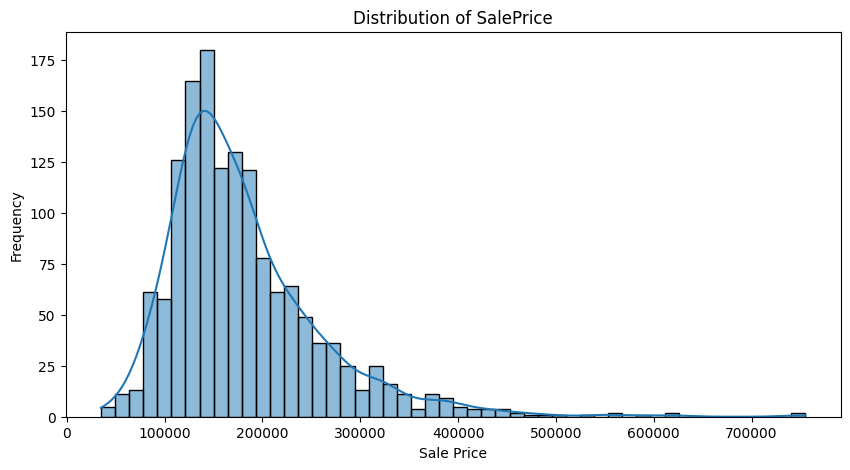

In [30]:
# SalePrice Distribution
plt.figure(figsize=(10,5))
sns.histplot(train_df["SalePrice"], bins=50, kde=True)
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.title("Distribution of SalePrice")
plt.show()

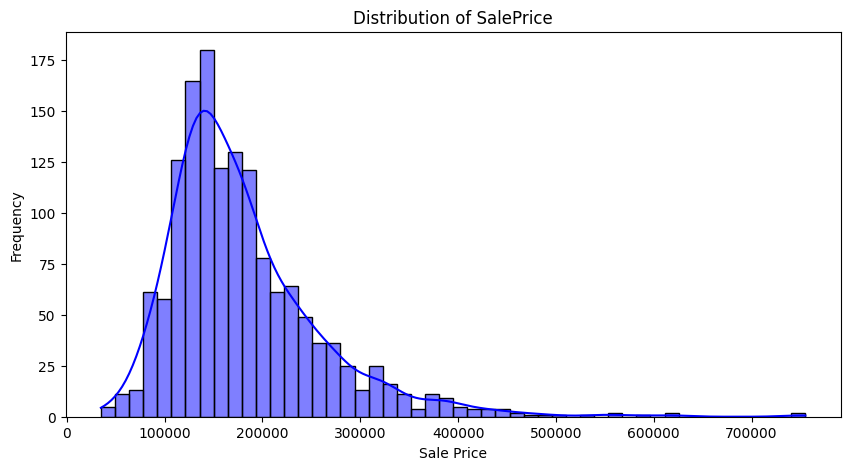

In [31]:
plt.figure(figsize=(10, 5))

# Histogram & KDE Plot
sns.histplot(train_df["SalePrice"], bins=50, kde=True, color="blue")
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.title("Distribution of SalePrice")
plt.show()

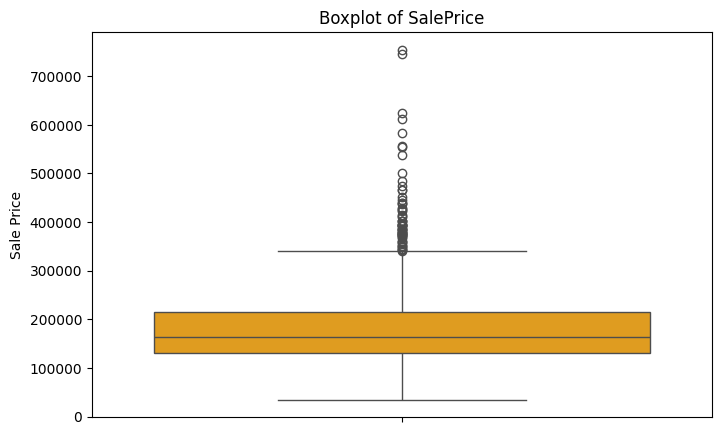

In [32]:
plt.figure(figsize=(8, 5))

# Boxplot
sns.boxplot(y=train_df["SalePrice"], color="orange")
plt.ylabel("Sale Price")
plt.title("Boxplot of SalePrice")
plt.show()


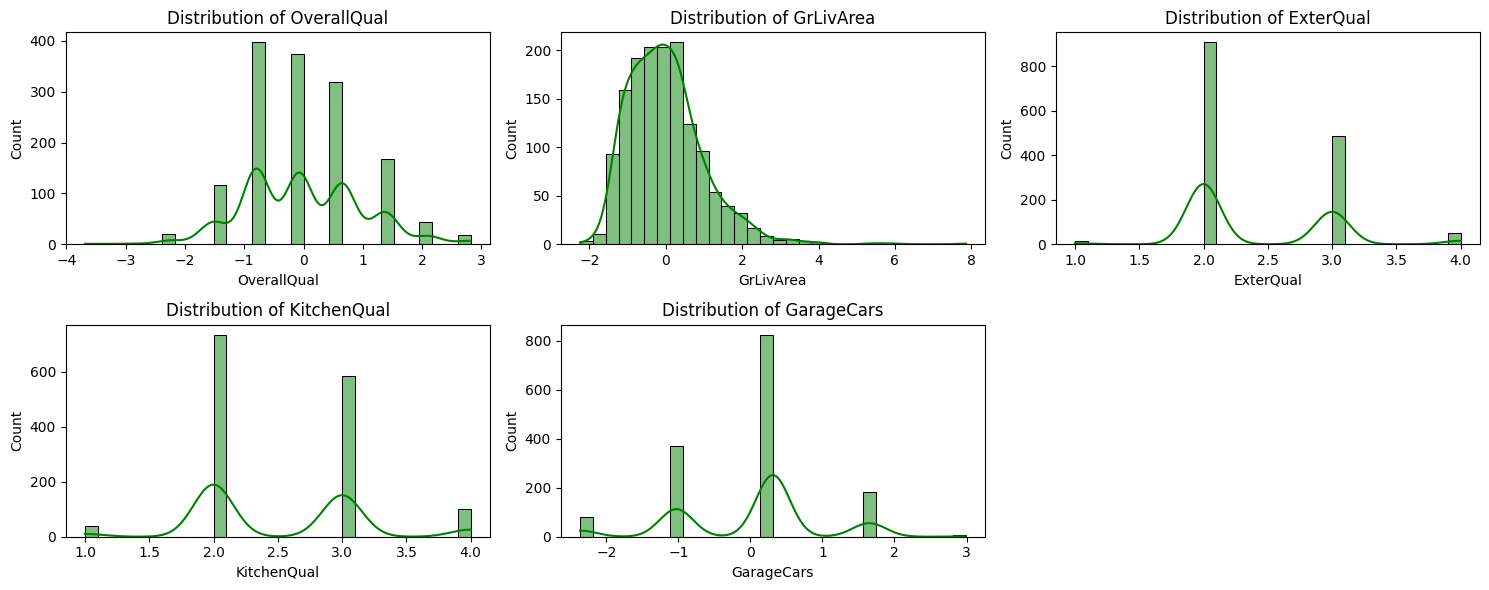

In [33]:
# Selecting Top 5 Correlated Features
top_features = train_df.corr()["SalePrice"].sort_values(ascending=False).index[1:6]

plt.figure(figsize=(15,6))
for i, feature in enumerate(top_features):
    plt.subplot(2,3,i+1)
    sns.histplot(train_df[feature], bins=30, kde=True, color="green")
    plt.xlabel(feature)
    plt.title(f"Distribution of {feature}")
plt.tight_layout()
plt.show()


2.2 Correlation Analysis

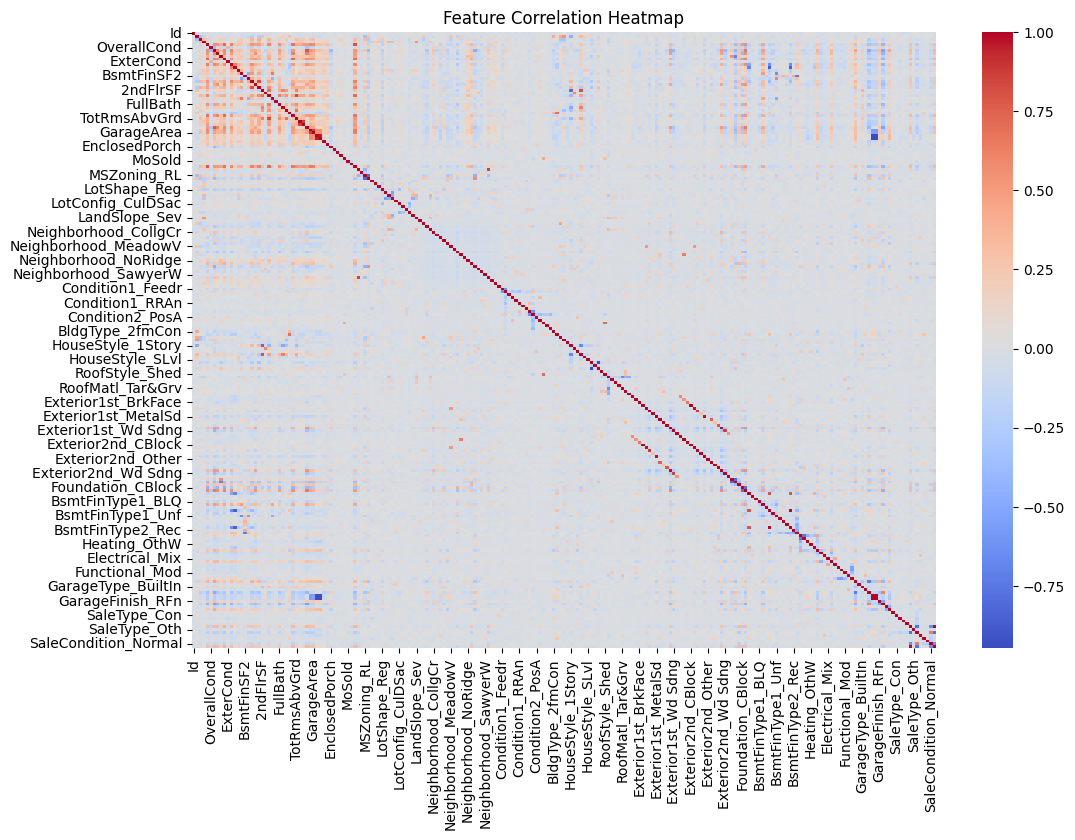

Top 10 Features Most Correlated with SalePrice:
 SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
ExterQual      0.682639
KitchenQual    0.659600
GarageCars     0.640409
GarageArea     0.623431
TotalBsmtSF    0.613581
1stFlrSF       0.605852
BsmtQual       0.585207
Name: SalePrice, dtype: float64


In [34]:
# Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(train_df.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

# Top correlated features with SalePrice
correlation = train_df.corr()["SalePrice"].sort_values(ascending=False)
print("Top 10 Features Most Correlated with SalePrice:\n", correlation.head(10))


2.3 Outlier Detection

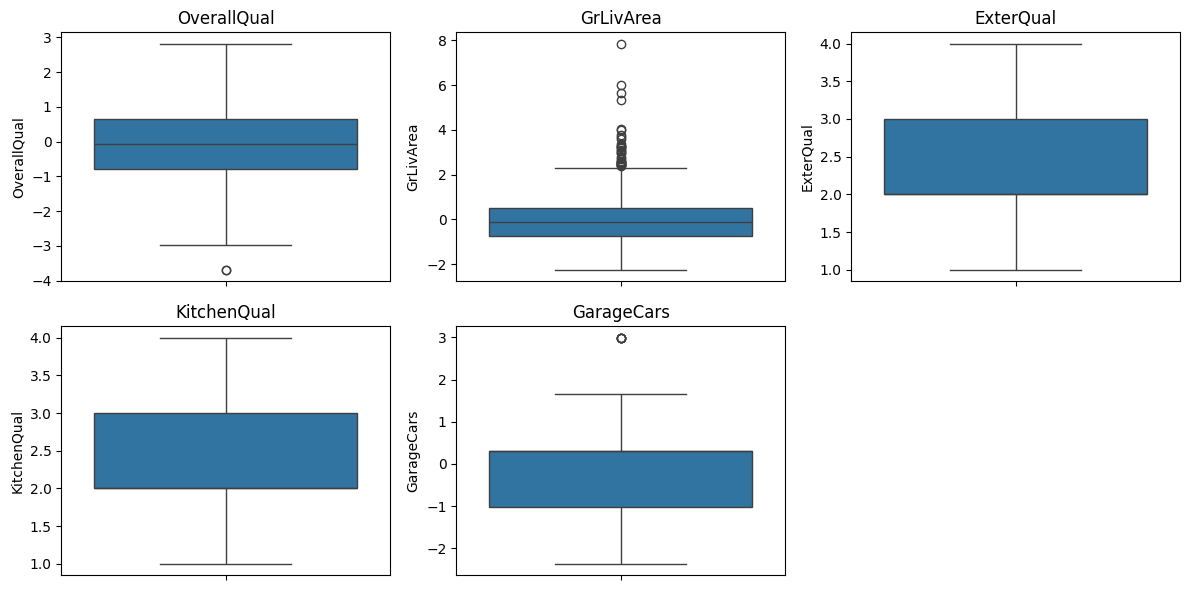

In [35]:
# Check outliers for key numerical features
top_features = correlation.index[1:6]  # Selecting top 5 numerical features

plt.figure(figsize=(12,6))
for i, feature in enumerate(top_features):
    plt.subplot(2,3,i+1)
    sns.boxplot(y=train_df[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()


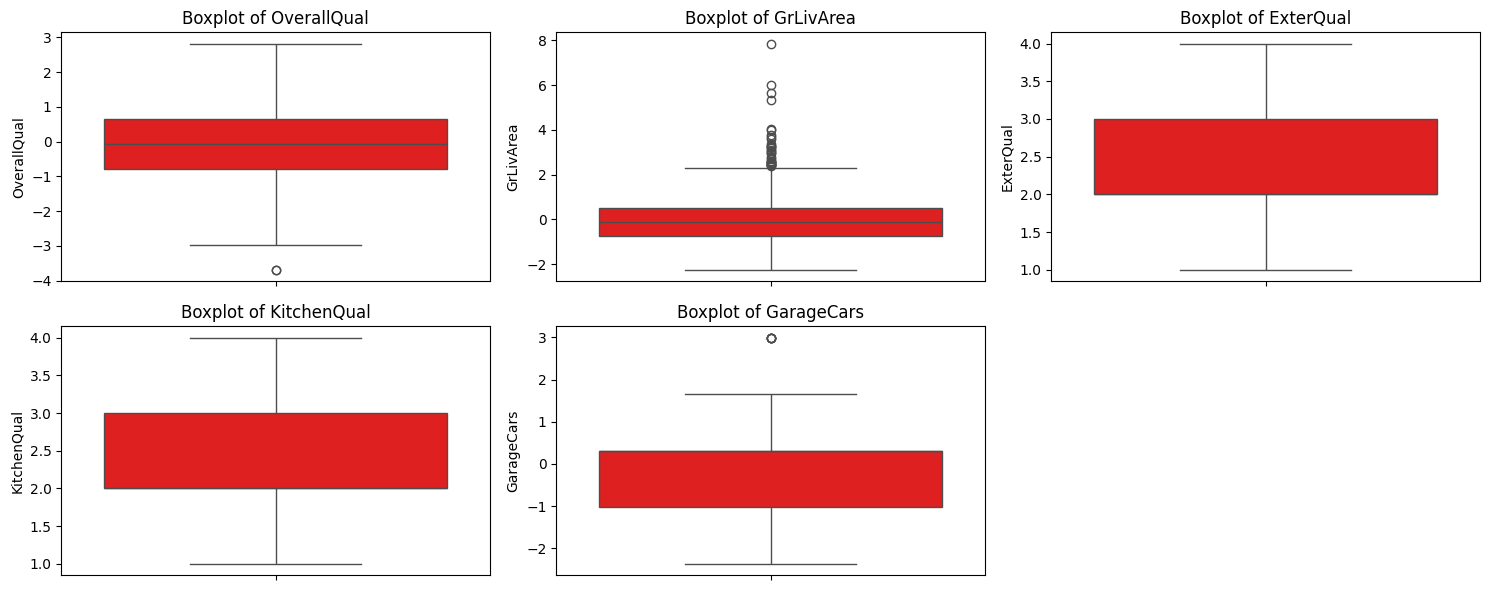

In [36]:
plt.figure(figsize=(15,6))
for i, feature in enumerate(top_features):
    plt.subplot(2,3,i+1)
    sns.boxplot(y=train_df[feature], color="red")
    plt.title(f"Boxplot of {feature}")
plt.tight_layout()
plt.show()


Step 3: Feature Engineering

In [37]:
import numpy as np

In [38]:
# Apply log transformation to SalePrice
train_df["SalePrice"] = np.log1p(train_df["SalePrice"])

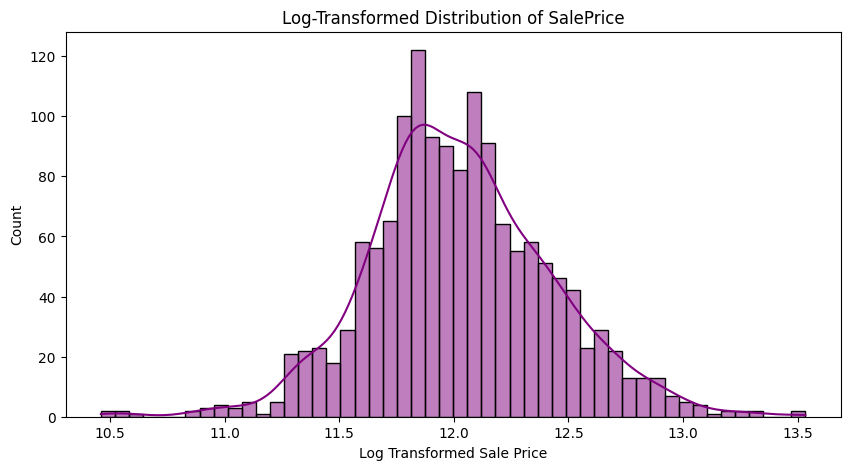

In [39]:
# Re-check distribution
plt.figure(figsize=(10, 5))
sns.histplot(train_df["SalePrice"], bins=50, kde=True, color="purple")
plt.xlabel("Log Transformed Sale Price")
plt.title("Log-Transformed Distribution of SalePrice")
plt.show()

In [40]:
# Function to remove outliers using IQR method
def remove_outliers(df, column, threshold=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Removing outliers from top correlated features
for feature in top_features:
    train_df = remove_outliers(train_df, feature)

In [41]:
# Check new shape after removing outliers
print("New train_df shape:", train_df.shape)

New train_df shape: (1422, 217)


In [42]:
# Creating new features
train_df["TotalSF"] = train_df["TotalBsmtSF"] + train_df["1stFlrSF"] + train_df["2ndFlrSF"]
train_df["TotalBath"] = train_df["FullBath"] + (0.5 * train_df["HalfBath"]) + train_df["BsmtFullBath"] + (0.5 * train_df["BsmtHalfBath"])
train_df["TotalPorchSF"] = train_df["OpenPorchSF"] + train_df["EnclosedPorch"] + train_df["3SsnPorch"] + train_df["ScreenPorch"]


In [43]:
# Apply same transformations to test set
test_df["TotalSF"] = test_df["TotalBsmtSF"] + test_df["1stFlrSF"] + test_df["2ndFlrSF"]
test_df["TotalBath"] = test_df["FullBath"] + (0.5 * test_df["HalfBath"]) + test_df["BsmtFullBath"] + (0.5 * test_df["BsmtHalfBath"])
test_df["TotalPorchSF"] = test_df["OpenPorchSF"] + test_df["EnclosedPorch"] + test_df["3SsnPorch"] + test_df["ScreenPorch"]

In [44]:
# Check new feature correlations
print(train_df[["TotalSF", "TotalBath", "TotalPorchSF", "SalePrice"]].corr())

               TotalSF  TotalBath  TotalPorchSF  SalePrice
TotalSF       1.000000   0.556682      0.194757   0.810068
TotalBath     0.556682   1.000000      0.087170   0.644054
TotalPorchSF  0.194757   0.087170      1.000000   0.160545
SalePrice     0.810068   0.644054      0.160545   1.000000


Step 4: Model Training & Evaluation

In [45]:
# Handling missing values
train_df.fillna(train_df.median(numeric_only=True), inplace=True)
test_df.fillna(test_df.median(numeric_only=True), inplace=True)

for col in train_df.select_dtypes(include=['object']).columns:
    train_df[col].fillna(train_df[col].mode()[0], inplace=True)
    test_df[col].fillna(test_df[col].mode()[0], inplace=True)

In [46]:
# Check missing values after handling
print("Missing values in train set:\n", train_df.isnull().sum().sum())
print("Missing values in test set:\n", test_df.isnull().sum().sum())


Missing values in train set:
 0
Missing values in test set:
 0


In [47]:
# One-Hot Encoding for categorical features
train_df = pd.get_dummies(train_df, drop_first=True)
test_df = pd.get_dummies(test_df, drop_first=True)

In [48]:
# Ensure test and train have same columns
test_df = test_df.reindex(columns=train_df.columns.drop("SalePrice"), fill_value=0)

In [49]:
# Check new shape
print("New shape of train_df:", train_df.shape)
print("New shape of test_df:", test_df.shape)


New shape of train_df: (1422, 220)
New shape of test_df: (1459, 219)


In [50]:
from sklearn.model_selection import train_test_split

In [51]:
# Define X (features) and y (target)
X = train_df.drop("SalePrice", axis=1)
y = train_df["SalePrice"]


In [52]:
# Split into train (80%) and validation (20%)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)


In [53]:
# Check split shapes
print("Training Set Shape:", X_train.shape, y_train.shape)
print("Validation Set Shape:", X_valid.shape, y_valid.shape)


Training Set Shape: (1137, 219) (1137,)
Validation Set Shape: (285, 219) (285,)


In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

In [55]:
# Train models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

In [56]:
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    rmse = np.sqrt(mean_squared_error(y_valid, preds))
    print(f"{name} RMSE: {rmse:.4f}")

Linear Regression RMSE: 526957.0942
Random Forest RMSE: 0.1526


Step 5: Hyperparameter Tuning & Final Model Selection

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
# Define hyperparameters
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

In [59]:
# Initialize Grid Search
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring="neg_root_mean_squared_error", verbose=2, n_jobs=-1)

In [60]:
# Train Grid Search
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [61]:
# Best parameters
print("Best parameters:", grid_search.best_params_)


Best parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [62]:
# Train final model with best parameters
best_rf = RandomForestRegressor(**grid_search.best_params_, random_state=42)
best_rf.fit(X, y)

RandomForestRegressor(max_depth=20, min_samples_leaf=2, random_state=42)

In [63]:
# Check performance on validation set
preds_valid = best_rf.predict(X_valid)
rmse = np.sqrt(mean_squared_error(y_valid, preds_valid))
print(f"Final Model RMSE: {rmse:.4f}")

Final Model RMSE: 0.0703


In [70]:
original_test = pd.read_csv("test.csv")

In [71]:
# Make predictions on test set
test_preds = best_rf.predict(test_df)


In [72]:
final_predictions = np.expm1(best_rf.predict(test_df))

In [73]:
# Convert predictions back to original scale
test_preds = np.expm1(test_preds)  # Undo log transformation

In [74]:
# Prepare submission file

# Create submission with correct Ids
submission = pd.DataFrame({
    "Id": original_test["Id"],  # Use original Id column
    "SalePrice": final_predictions
})

In [75]:
submission.to_csv("submission.csv", index=False)

In [76]:
print("✅ Submission file created successfully!")


✅ Submission file created successfully!
